## Loading MNIST dataset

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [3]:
#download fashion minst data
training_data = datasets.FashionMNIST(
    root="data",
    train="True",
    download=True,
    transform=ToTensor() #transform data to tensor
)
test_data = datasets.FashionMNIST(
    root="data",
    train="False",
    download=True,
    transform=ToTensor()
)

In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

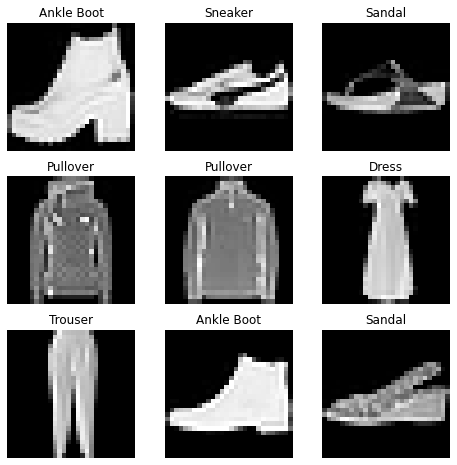

In [27]:
#visualizing the dataset
labels_map={
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows +1):
    #training data의 index 사이에서 randint로 하나 무작위 뽑아서 그 값을 item()으로 꺼낸 것
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # traininig_data 은 tuple로 (img, label) 로 구성되어있음
    # training_data[index][0].size() 해보면 torch.Size([1, 28, 28]) 가 나오며,
    # training_data[index][1] 은 label을 나타낸다 
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
    

### Prepare data with DataLoaders

In [28]:
from torch.utils.data import DataLoader

#define dataloader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


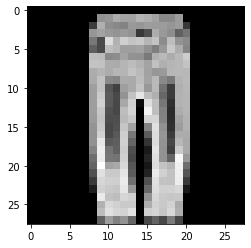

Label: 1


In [41]:
#Iterate 
#iterator로 바꾸어서 next로 계속 넘겨준다
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze() #squeeze() : 차원이 1인 곳을 제거
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


### Normalization

+ 사진 픽셀들은 0 ~ 255 값을 가지는데, 이를 정규화하지 않으면 픽셀값들의 큰 편차로 훈련에 좋지 않음
+ transform 함수로 preprocessing

In [45]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
#torchVision dataset의 transform 은 feature을 바꾸며, target_transform은 label을 바꾸게 하는 parameter
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    #label값을 정수가 아닌 one hot encode tensor로 바꿈
    #torch.tensor.scatter_(dim, index, src, reduce=None)
    # scatter_(축, 새로 나타낼 인덱스, 새로 저장할 입력값)
    # label값에 해당하는 index에 value=1을 할당한다
    target_transform=Lambda(lambda y : torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [44]:
torch.zeros(10).scatter_(0, torch.tensor(3), value=1)

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])